# Data Loading And visualization

In [ ]:
import torch
import torch.nn as nn
import torchvision
import os
from torch.utils.data import Dataset
from PIL import Image
from torch.utils.data import Dataset,DataLoader, Subset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os
from PIL import Image
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_path = '/content/drive/MyDrive/assignment 3 DL/train-20240312T053212Z-001.zip'
extract_path = '/content/drive/MyDrive/assignment 3 DL/train'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

In [ ]:
import zipfile
zip_path = '/content/drive/MyDrive/assignment 3 DL/train_masks-20240312T053737Z-001.zip'
extract_path = '/content/drive/MyDrive/assignment 3 DL /train_masks'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

In [ ]:
import zipfile
zip_path = '/content/drive/MyDrive/assignment 3 DL/test-20240312T044709Z-001.zip'
extract_path = '/content/drive/MyDrive/assignment 3 DL /test'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

In [ ]:
import zipfile
zip_path = '/content/drive/MyDrive/assignment 3 DL/test_masks-20240312T053906Z-001.zip'
extract_path = '/content/drive/MyDrive/assignment 3 DL/test_masks'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

In [ ]:
image_dir = '/content/drive/MyDrive/assignment 3 DL/train/train'
mask_dir =  '/content/drive/MyDrive/assignment 3 DL /train_masks/train_masks'
test_mask_dir ='/content/drive/MyDrive/assignment 3 DL/test_masks/test_masks'
test_image_dir = '/content/drive/MyDrive/assignment 3 DL /test/test'


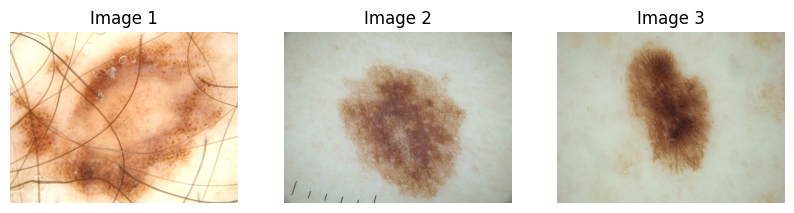

In [ ]:
data_dir = image_dir
image_files = [f for f in os.listdir(data_dir) if f.endswith('.jpg')]
plt.figure(figsize=(10, 5))

for i in range(3):
    image_path = os.path.join(data_dir, image_files[i])
    image = Image.open(image_path)
    plt.subplot(1, 3, i+1)
    plt.imshow(image)
    plt.title(f"Image {i+1}")
    plt.axis('off')
plt.show()

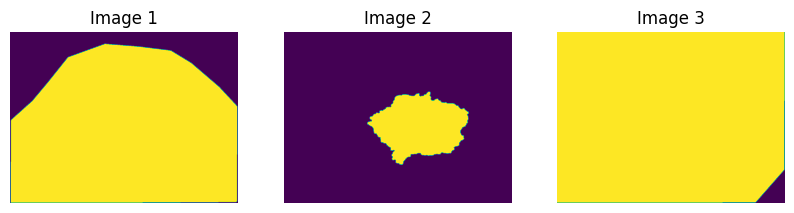

In [ ]:
data_dir = mask_dir
image_files = [f for f in os.listdir(data_dir) if f.endswith('.png')]
plt.figure(figsize=(10, 5))

for i in range(3):
    image_path = os.path.join(data_dir, image_files[i])
    image = Image.open(image_path)
    plt.subplot(1, 3, i+1)
    plt.imshow(image)
    plt.title(f"Image {i+1}")
    plt.axis('off')
plt.show()

## customize the data set and importing the Model

In [ ]:
class CustomDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.image_files = os.listdir(image_dir)
        self.mask_files = os.listdir(mask_dir)
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        image_path = os.path.join(self.image_dir, img_name)

        if not os.path.isfile(image_path):


            return self.__getitem__((idx + 1) % len(self.image_files))

        image = Image.open(image_path).convert('RGB')


        mask_name = img_name.split('.')[0] + '.png'
        mask_path = os.path.join(self.mask_dir, mask_name)
        mask = Image.open(mask_path).convert('L')

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask


In [ ]:
custom_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])
dataset = CustomDataset(image_dir, mask_dir, transform=custom_transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
test_dataset= CustomDataset(test_image_dir, test_mask_dir, transform=custom_transform)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

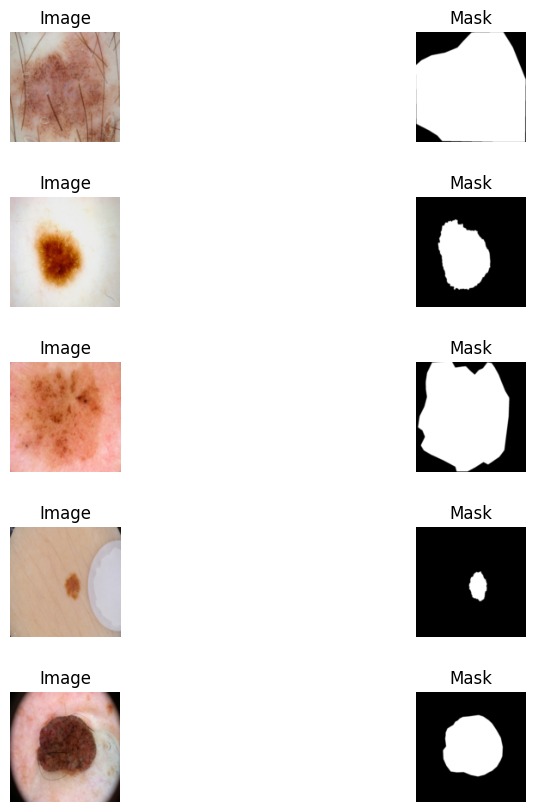

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


def visualize_dataset(dataloader, num_samples=5):
    fig, axes = plt.subplots(num_samples, 2, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.1)
    for i, (image, mask) in enumerate(dataloader):
        if i >= num_samples:
            break

        axes[i, 0].imshow(np.transpose(image[0], (1, 2, 0)))
        axes[i, 0].set_title('Image')
        axes[i, 0].axis('off')
        axes[i, 1].imshow(mask[0, 0], cmap='gray')
        axes[i, 1].set_title('Mask')
        axes[i, 1].axis('off')
    plt.show()
visualize_dataset(dataloader, num_samples=5)

In [ ]:
mobile_net = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 38.2MB/s]


In [ ]:
features = mobile_net.features
num_removed_layers = 4
for _ in range(num_removed_layers):
    features = nn.Sequential(*list(features.children())[:-1])
mobile_net.features = features

In [ ]:
encoder_without_classifier = nn.Sequential(*list(mobile_net.children())[:-1])
mobile_net = encoder_without_classifier

In [ ]:
print(mobile_net)

Sequential(
  (0): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, m

In [ ]:
input_shape = (1, 3, 128, 128)
input_tensor = torch.randn(input_shape)
mobile_net.eval()
with torch.no_grad():
    output = mobile_net(input_tensor)
print("Output shape:", output.shape)

Output shape: torch.Size([1, 160, 4, 4])


In [ ]:
class CustomDecoder(nn.Module):
    def __init__(self, input_channels, output_channels):
        super(CustomDecoder, self).__init__()
        self.decoder = nn.Sequential(
            nn.Conv2d(input_channels, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 16, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(16, 12, kernel_size=4, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(12, 8, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(8, 4, kernel_size=4, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(4, 2, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(2, output_channels, kernel_size=4, stride=2, padding=1),

            nn.Sigmoid()
        )

    def forward(self, x):


      return self.decoder(x)

In [ ]:
decoder = CustomDecoder(160, output_channels=1)

In [ ]:
encoder = mobile_net

In [ ]:
model = nn.Sequential(
    encoder,
    decoder
)
print(model)
np.random.seed(42)
model.to(device)

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1

##Model with Fine-Tuning

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 25
train_loss_list = []
test_loss_list = []
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    total_samples = 0
    for i, data in enumerate(dataloader, 0):
        image, mask = data
        image, mask = image.to(device), mask.to(device)
        optimizer.zero_grad()
        outputs = model(image)
        loss = criterion(outputs, mask)
        loss.backward()
        optimizer.step()
        total_samples += mask.size(0)
        train_loss += loss.item() * image.size(0)
    epoch_loss = train_loss / total_samples
    train_loss_list.append(epoch_loss)


    model.eval()
    test_loss = 0
    total_examples = 0
    with torch.no_grad():
        for i, data in enumerate(test_dataloader, 0):
            image, mask = data
            image, mask = image.to(device), mask.to(device)
            output = model(image)
            loss = criterion(output, mask)
            total_examples += mask.size(0)
            test_loss += loss.item() * image.size(0)
    test_loss /= total_examples
    test_loss_list.append(test_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Testing Loss: {test_loss}, Training Loss: {epoch_loss}")


Epoch 1/25, Testing Loss: 0.6871295928326006, Training Loss: 0.7458187596003214
Epoch 2/25, Testing Loss: 0.8289996110355005, Training Loss: 0.4768389418390062
Epoch 3/25, Testing Loss: 0.29530012568257413, Training Loss: 0.3080007063017951
Epoch 4/25, Testing Loss: 0.268040706976108, Training Loss: 0.27128512859344484
Epoch 5/25, Testing Loss: 0.2761024388836053, Training Loss: 0.25110330621401467
Epoch 6/25, Testing Loss: 0.2516391596567662, Training Loss: 0.23395519951979318
Epoch 7/25, Testing Loss: 0.258140990869351, Training Loss: 0.22755283382203845
Epoch 8/25, Testing Loss: 0.2612947063584441, Training Loss: 0.218662421339088
Epoch 9/25, Testing Loss: 0.2870176362959879, Training Loss: 0.21928062707185744
Epoch 10/25, Testing Loss: 0.24500795282757692, Training Loss: 0.21093466851446363
Epoch 11/25, Testing Loss: 0.25268557101566747, Training Loss: 0.19853785143958197
Epoch 12/25, Testing Loss: 0.30216827744858876, Training Loss: 0.2576051129235162
Epoch 13/25, Testing Loss: 0.

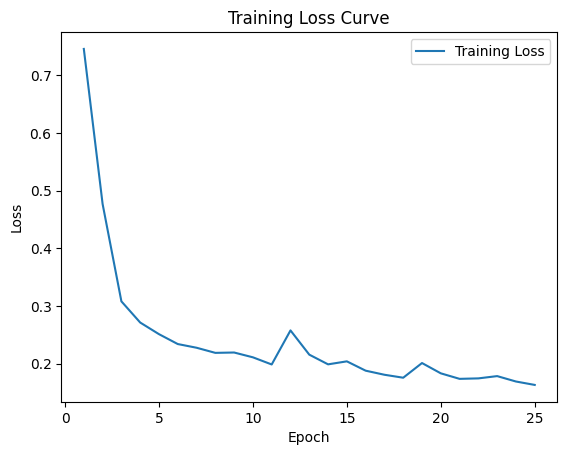

In [ ]:
plt.plot(range(1, num_epochs+1), train_loss_list, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

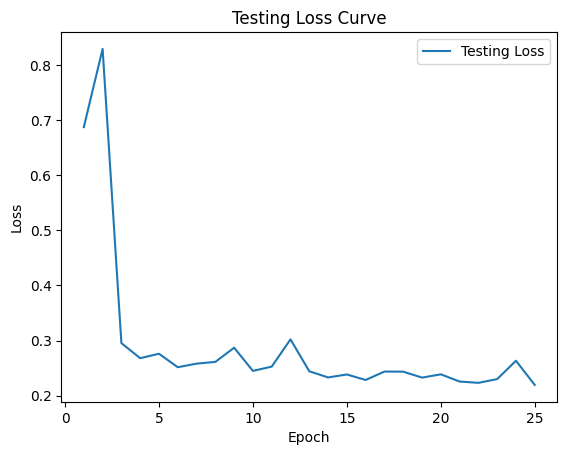

In [ ]:
plt.plot(range(1, num_epochs+1), test_loss_list, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Testing Loss Curve')
plt.legend()
plt.show()

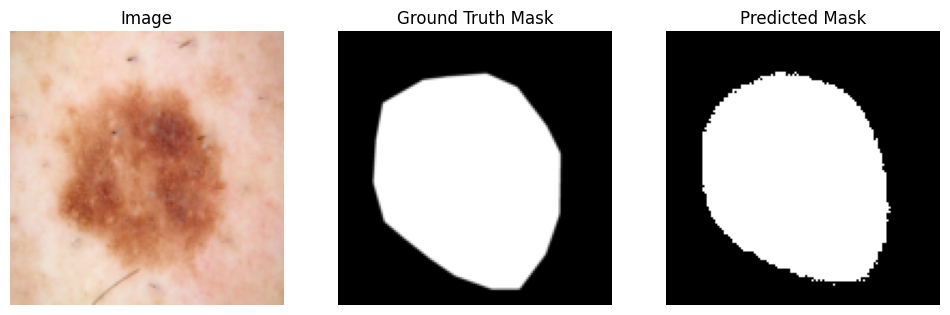

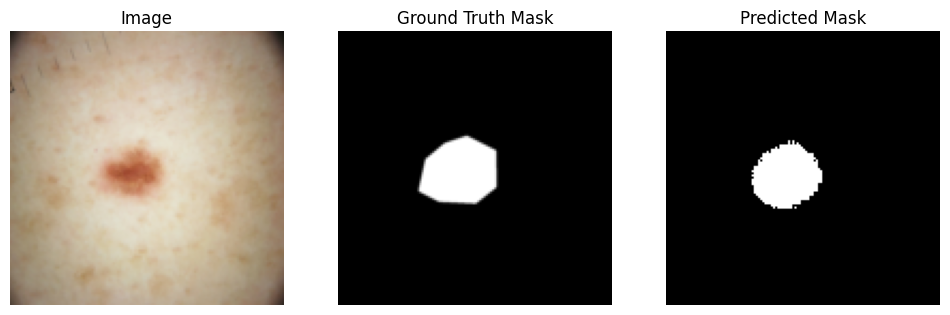

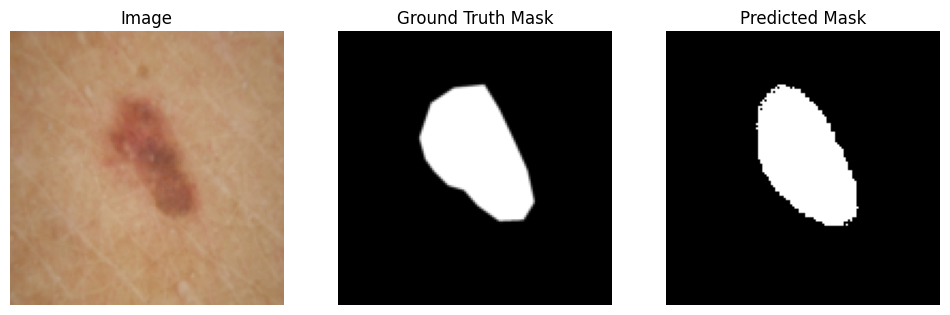

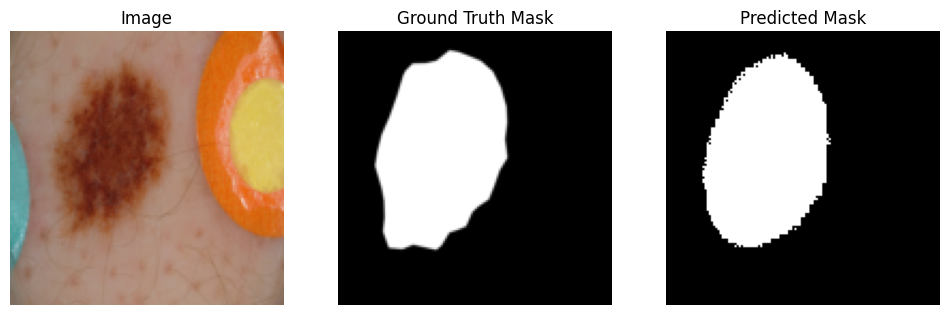

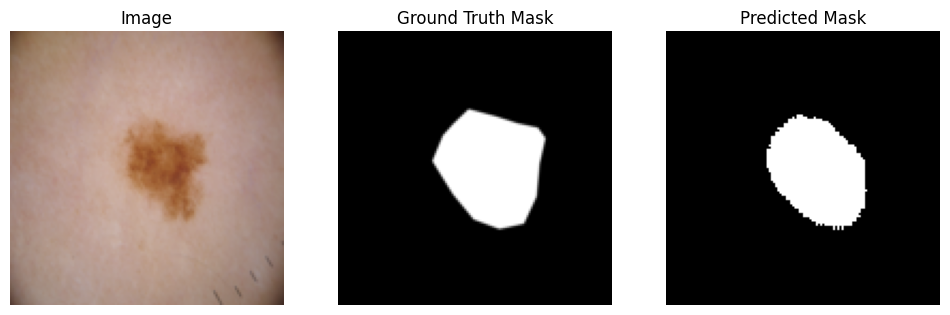

In [ ]:
import matplotlib.pyplot as plt
import torch

def visualize_prediction(image, mask, predicted_mask):
    fig, axes = plt.subplots(1, 3, figsize=(12, 5))
    image = image.permute(1, 2, 0) if image.dim() == 3 else image
    mask = mask.permute(1, 2, 0) if mask.dim() == 3 else mask
    predicted_mask = predicted_mask.squeeze().cpu().numpy()

    axes[0].imshow(image)
    axes[0].set_title('Image')
    axes[0].axis('off')

    axes[1].imshow(mask.squeeze(), cmap='gray')
    axes[1].set_title('Ground Truth Mask')
    axes[1].axis('off')

    axes[2].imshow(predicted_mask > 0.5, cmap='gray')
    axes[2].set_title('Predicted Mask')
    axes[2].axis('off')

    plt.show()

model.eval()
with torch.no_grad():
    images, masks = next(iter(dataloader))
    images = images.to(device)
    predicted_masks = model(images)
    for i in range(min(5, len(images))):
        visualize_prediction(images[i].cpu(), masks[i].cpu(), predicted_masks[i].cpu())



In [ ]:
def dice_score(pred, target):
    smooth = 1e-6
    intersection = (pred * target).sum()
    union = pred.sum() + target.sum()
    dice = (2.0 * intersection + smooth) / (union + smooth)
    return dice

def iou_score(pred, target):
    smooth = 1e-6
    intersection = (pred * target).sum()
    union = pred.sum() + target.sum() - intersection
    iou = (intersection + smooth) / (union + smooth)
    return iou

In [ ]:
model.eval()
test_loss = 0
total_examples = 0
mean_dice_score = 0
mean_iou_score = 0

with torch.no_grad():
    for i, data in enumerate(test_dataloader):
        image, mask = data
        image = image.to(device)
        mask = mask.to(device)
        output = model(image)
        loss = criterion(output, mask)
        test_loss += loss.item() * image.size(0)
        pred_masks = (output > 0.5).float()
        for pred_mask, true_mask in zip(pred_masks, mask):
            mean_dice_score += dice_score(pred_mask, true_mask)
            mean_iou_score += iou_score(pred_mask, true_mask)

        total_examples += mask.size(0)
mean_dice_score /= total_examples
mean_iou_score /= total_examples
test_loss /= total_examples
print(f"Mean Dice Score on Test Data: {mean_dice_score}")
print(f"Mean IoU Score on Test Data: {mean_iou_score}")
print(f"Average Test Loss: {test_loss}")


Mean Dice Score on Test Data: 0.8800550103187561
Mean IoU Score on Test Data: 0.8007685542106628
Average Test Loss: 0.2195259714818567


## Model with Frezzing Weight

In [ ]:
encoder1 =mobile_net

In [ ]:
decoder1 = CustomDecoder(160, output_channels=1)

In [ ]:
model1 = nn.Sequential(
    encoder1,
    decoder1
)
print(model1)
np.random.seed(42)
model1.to(device)

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1

In [ ]:
for param in model1[0].parameters():
    param.requires_grad = False

In [ ]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model1[1].parameters(), lr=0.001)

In [ ]:
num_epochs = 25
train_loss_list = []
test_loss_list = []

for epoch in range(num_epochs):
    model1.train()
    train_loss = 0
    total_samples = 0
    for i, data in enumerate(dataloader, 0):
        image, mask = data
        image, mask = image.to(device), mask.to(device)
        optimizer.zero_grad()
        outputs = model1(image)
        loss = criterion(outputs, mask)
        loss.backward()
        optimizer.step()
        total_samples += mask.size(0)
        train_loss += loss.item() * image.size(0)
    epoch_loss = train_loss / total_samples
    train_loss_list.append(epoch_loss)

    model1.eval()
    test_loss = 0
    total_examples = 0
    with torch.no_grad():
        for i, data in enumerate(test_dataloader, 0):
            image, mask = data
            image, mask = image.to(device), mask.to(device)
            output = model1(image)
            loss = criterion(output, mask)
            total_examples += mask.size(0)
            test_loss += loss.item() * image.size(0)
    test_loss /= total_examples
    test_loss_list.append(test_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Testing Loss: {test_loss}, Training Loss: {epoch_loss}")

Epoch 1/25, Testing Loss: 0.4855266938423418, Training Loss: 0.6454777346716987
Epoch 2/25, Testing Loss: 0.2954939008545435, Training Loss: 0.3151752852069007
Epoch 3/25, Testing Loss: 0.28747104238079846, Training Loss: 0.23950886454847123
Epoch 4/25, Testing Loss: 0.24817305103455495, Training Loss: 0.2209644509686364
Epoch 5/25, Testing Loss: 0.2035946656106959, Training Loss: 0.11671061019102733
Epoch 6/25, Testing Loss: 0.1846681834839894, Training Loss: 0.0852916134066052
Epoch 7/25, Testing Loss: 0.18515658706898425, Training Loss: 0.0840445727109909
Epoch 8/25, Testing Loss: 0.18188942068484967, Training Loss: 0.07791410684585572
Epoch 9/25, Testing Loss: 0.18049929831619313, Training Loss: 0.0721812919444508
Epoch 10/25, Testing Loss: 0.18558465636342686, Training Loss: 0.07206570484571986
Epoch 11/25, Testing Loss: 0.1966143443905269, Training Loss: 0.07238180238339637
Epoch 12/25, Testing Loss: 0.17918633073961515, Training Loss: 0.07134967830446032
Epoch 13/25, Testing Los

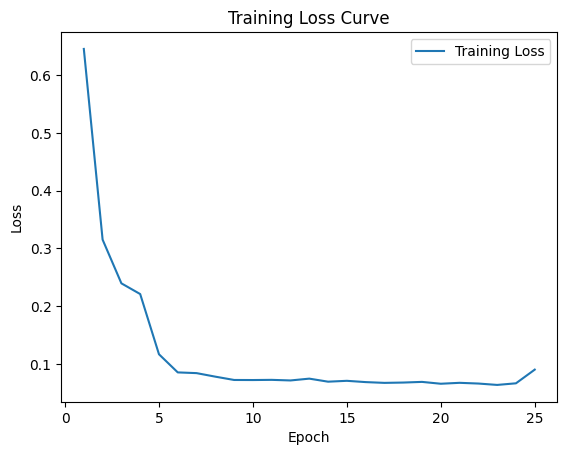

In [ ]:
plt.plot(range(1, num_epochs+1), train_loss_list, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

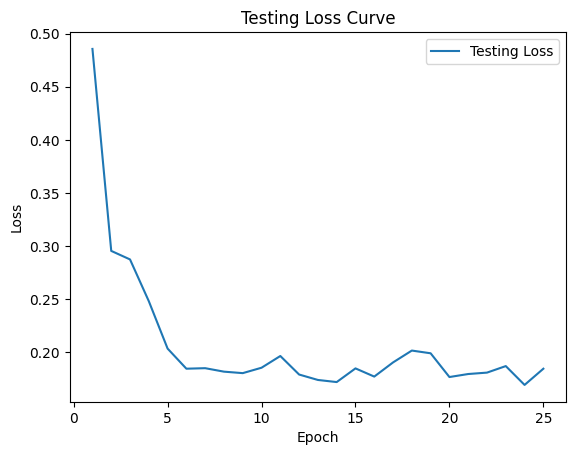

In [ ]:
plt.plot(range(1, num_epochs+1), test_loss_list, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Testing Loss Curve')
plt.legend()
plt.show()

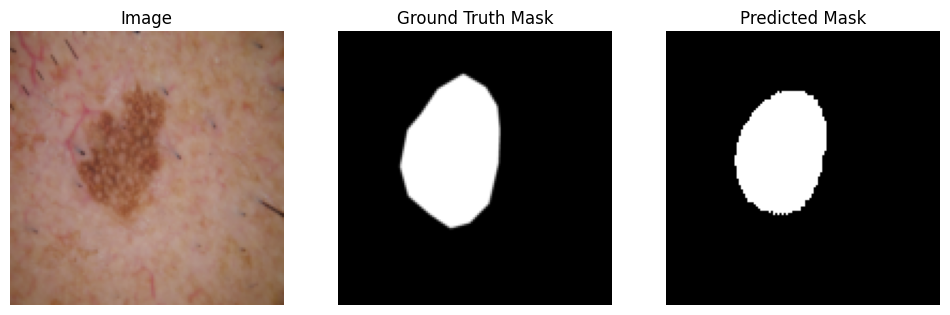

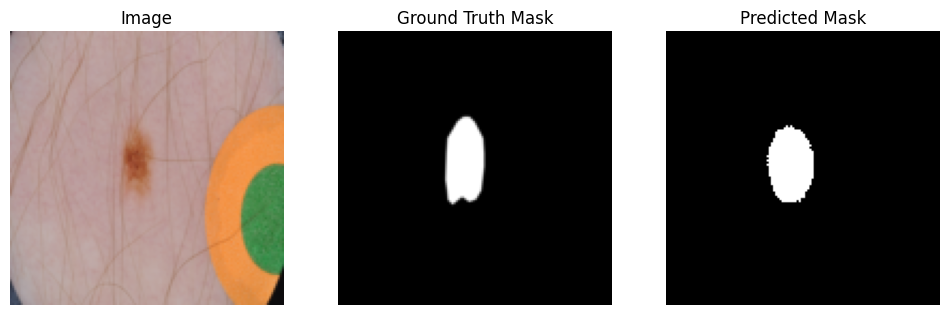

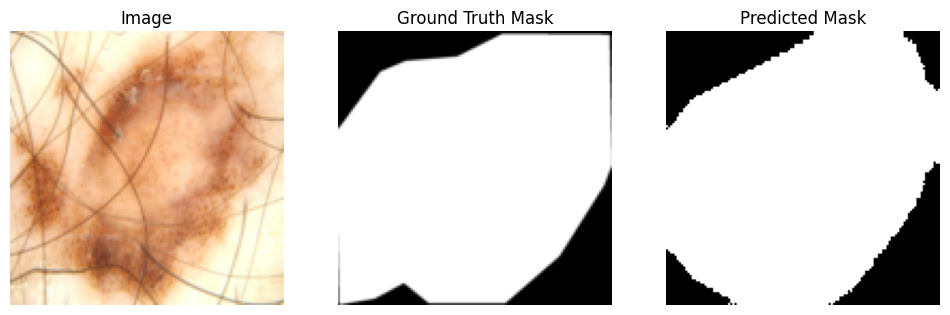

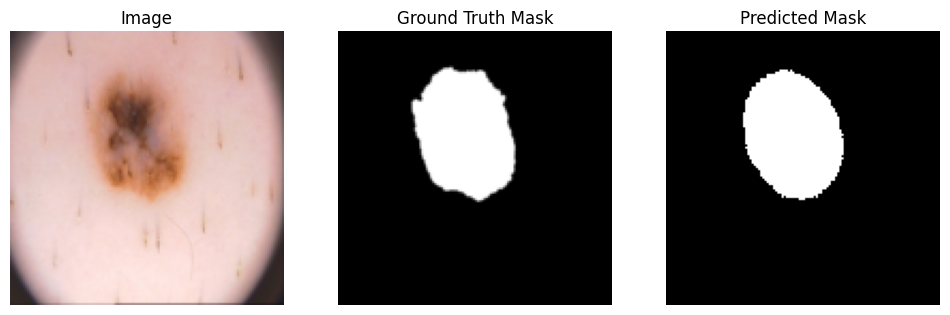

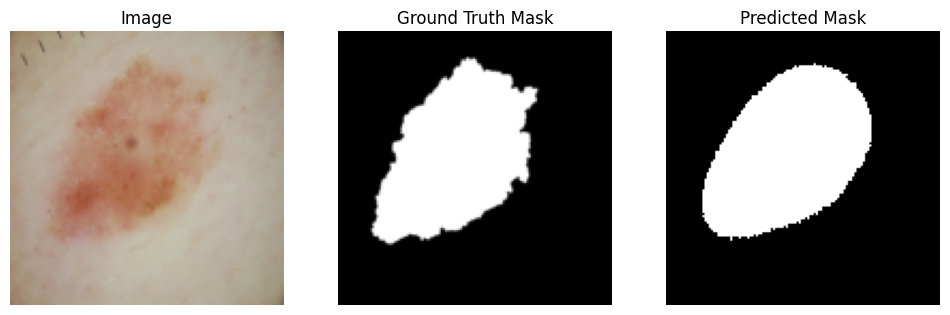

In [ ]:
import matplotlib.pyplot as plt
import torch

def visualize_prediction(image, mask, predicted_mask):
    fig, axes = plt.subplots(1, 3, figsize=(12, 5))
    image = image.permute(1, 2, 0) if image.dim() == 3 else image
    mask = mask.permute(1, 2, 0) if mask.dim() == 3 else mask
    predicted_mask = predicted_mask.squeeze().cpu().numpy()

    axes[0].imshow(image)
    axes[0].set_title('Image')
    axes[0].axis('off')

    axes[1].imshow(mask.squeeze(), cmap='gray')
    axes[1].set_title('Ground Truth Mask')
    axes[1].axis('off')

    axes[2].imshow(predicted_mask > 0.5, cmap='gray')
    axes[2].set_title('Predicted Mask')
    axes[2].axis('off')

    plt.show()

model1.eval()
with torch.no_grad():
    images, masks = next(iter(dataloader))
    images = images.to(device)
    predicted_masks = model1(images)
    for i in range(min(5, len(images))):
        visualize_prediction(images[i].cpu(), masks[i].cpu(), predicted_masks[i].cpu())


In [ ]:
model1.eval()
test_loss = 0
total_examples = 0
mean_dice_score = 0
mean_iou_score = 0

with torch.no_grad():
    for i, data in enumerate(test_dataloader):
        image, mask = data
        image = image.to(device)
        mask = mask.to(device)
        output = model1(image)
        loss = criterion(output, mask)
        test_loss += loss.item() * image.size(0)
        pred_masks = (output > 0.5).float()
        for pred_mask, true_mask in zip(pred_masks, mask):
            mean_dice_score += dice_score(pred_mask, true_mask)
            mean_iou_score += iou_score(pred_mask, true_mask)

        total_examples += mask.size(0)
mean_dice_score /= total_examples
mean_iou_score /= total_examples
test_loss /= total_examples
print(f"Mean Dice Score on Test Data: {mean_dice_score}")
print(f"Mean IoU Score on Test Data: {mean_iou_score}")
print(f"Average Test Loss: {test_loss}")


Mean Dice Score on Test Data: 0.8786326050758362
Mean IoU Score on Test Data: 0.7974322438240051
Average Test Loss: 0.18465137009884877
